# Detectie van gezichten met Haar & CNN

- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Docent: Michiel Bontenbal 
- Datum: Vrijdag 9 februari 2024

### Doel van dit notebook
In dit Notebook leer je hoe je gezichten kan herkennen met een voorgetraind CNN.

### Inhoud
0. Installeer en importeer de modules
1. Importeer en toon een afbeelding
2. Detecteer gezichten met CNN
3. Bonus: gebruik je video en maak een simpele webapp

### Bronnen en meer informatie
 
- https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

----
Acknowledgements: Stijn Oomes

## 0. Installeer en importeer de modules

In [1]:
# !pip install mtcnn

In [2]:
from mtcnn.mtcnn import MTCNN

In [3]:
# importeer matplot voor het plotten van afbeeldingen
import matplotlib.pyplot as plt

#gebruik onderstaande 'cell magic' om het plaatje in het notebook te tonen
%matplotlib inline 

## 1. Importeer en toon afbeelding

Zoek een kleuren foto met 5 tot 10 gezichten. Let op dit moet een .jpg of jpeg zijn. .png werkt niet.

Laat de foto op het scherm zien. Hoeveel gezichten zie jij?

Gebruik bijvoorbeeld dezelfde foto als van de Haar Cascade.

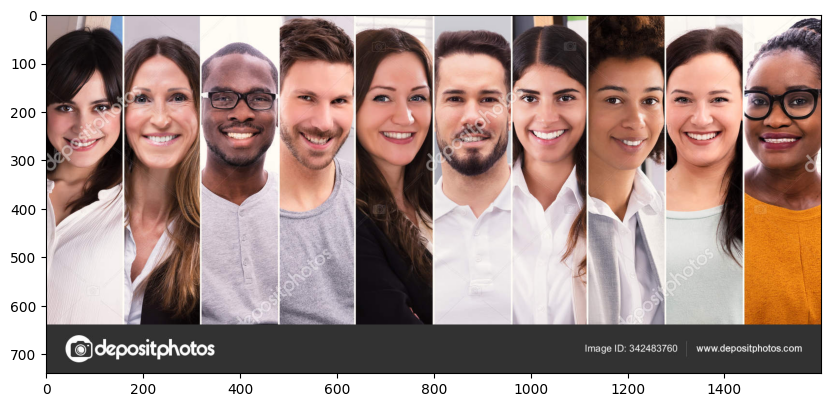

In [4]:
import matplotlib.pyplot as plt
img = plt.imread('faces.jpg') # geen .png, dan gaat het verderop mis
plt.figure(figsize=(10,8))
plt.imshow(img);

Welk datatype heeft de ingeladen afbeelding?

Hoe groot is de afbeelding in pixels?
Gebruik de code hieronder.

In [5]:
#print type and shape of image
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(740, 1600, 3)


## 3. Multi-Task Convolutional Neural Network

In [6]:
#import the library. You can ignore a possible tensorflow warning
from mtcnn.mtcnn import MTCNN

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import matplotlib.pyplot as plt

In [7]:
filename = 'faces.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
mtcnn_faces = detector.detect_faces(pixels)

print("Aantal gezichten: " + str(len(mtcnn_faces)))



2/2 [==============================] - 0s 27ms/step
Aantal gezichten: 10


In [8]:
#inspecteer het eerste gezicht. Wat wordt hier vastgelegd?
mtcnn_faces[0]

{'box': [322, 96, 157, 205],
 'confidence': 0.9999983310699463,
 'keypoints': {'left_eye': (365, 173),
  'right_eye': (439, 173),
  'nose': (403, 210),
  'mouth_left': (360, 241),
  'mouth_right': (443, 243)}}

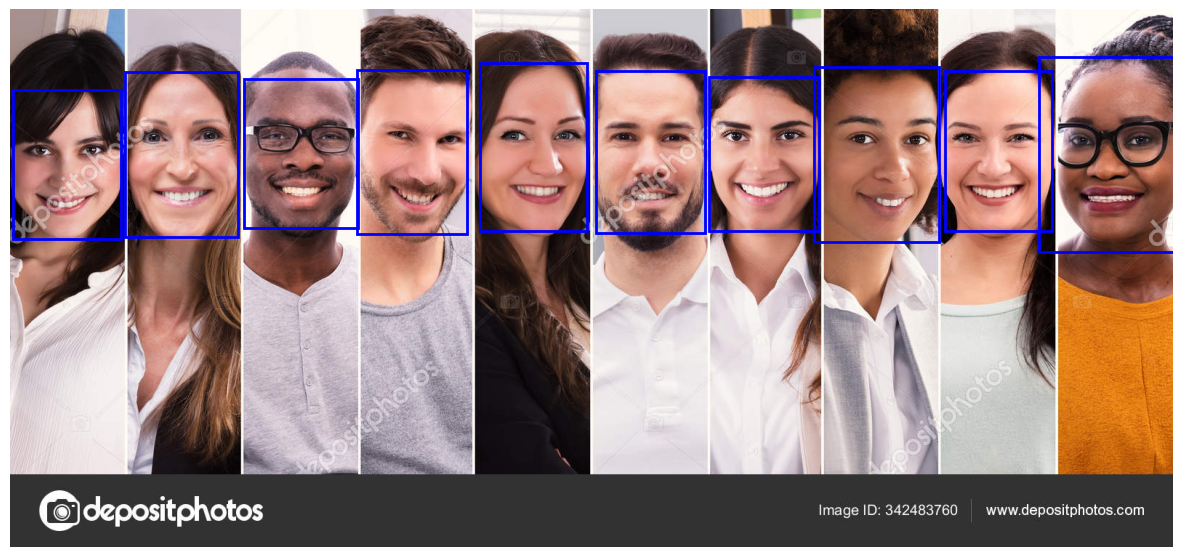

In [9]:
def draw_image_with_boxes(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='blue',linewidth=2.0)
        ax.add_patch(rect)
        
    plt.show()


draw_image_with_boxes(pixels, mtcnn_faces)

**OPDRACHT**: 

Evalueer de verschillen tussen de Haar Cascade classifier, de CNN en wat je zelf ziet.

- Ik herken ... gezichten.
- Haar Cascade herkent ... gezichten
- CNN herkent ... gezichten

Ligt je resultaten toe.

## Toon ook ogen, neus en mond

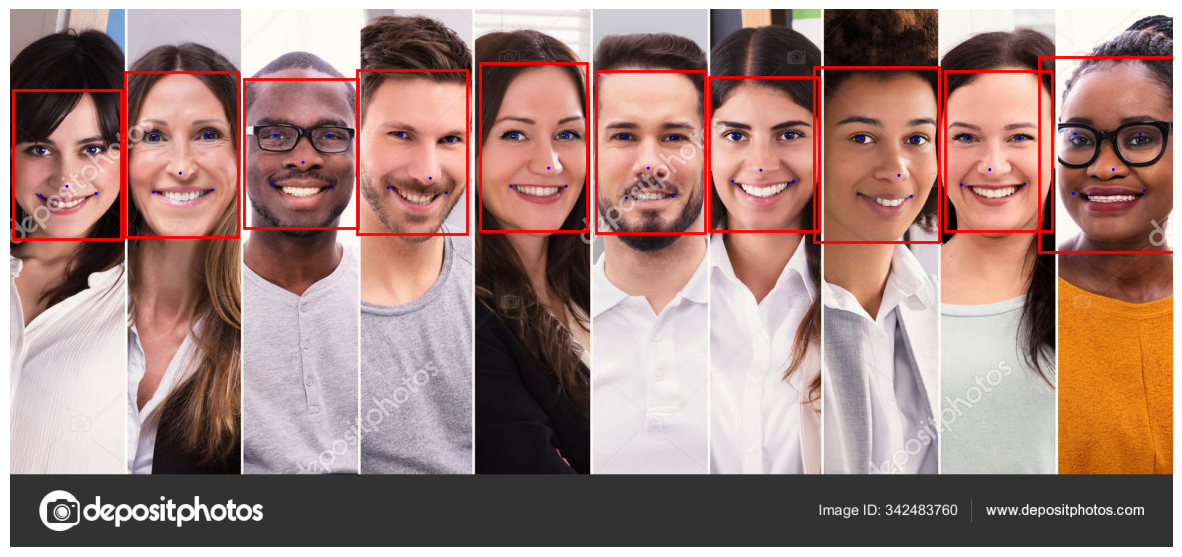

In [10]:
def draw_faces(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red',linewidth=2.0)
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=1.1, color='blue')
            ax.add_patch(dot)
            
    plt.show()

draw_faces(pixels, mtcnn_faces)

# Afronding

Sla het ingevulde notebook op in je portfolio op GitLab - Minor Logboek AAI.
Maak een aantekening voor je Bloom tabel.